In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
bank_data = pd.read_csv('Dados/BankChurners.csv')

In [3]:
bank_data = bank_data.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", axis=1)
bank_data = bank_data.drop("Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", axis=1)
bank_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Selecionando colunas relevantes para o clustering
selected_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Credit_Limit', 'Customer_Age']

# Filtrando o dataset
filtered_data = bank_data[selected_columns]

# Convertendo variáveis categóricas em numéricas com one-hot encoding
data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

# Normalizando as variáveis numéricas ('Total' e 'Rating')
scaler = StandardScaler()
data_encoded[['Total', 'Rating']] = scaler.fit_transform(data_encoded[['Credit_Limit', 'Customer_Age']])

# Visualizando as primeiras linhas dos dados codificados e normalizados
data_encoded.head()

,Credit_Limit,Customer_Age,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Total,Rating
0,12691.0,45,False,True,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,0.446622,-0.165406
1,8256.0,49,True,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,-0.041367,0.333570
2,3418.0,51,False,True,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,-0.573698,0.583058
3,3313.0,40,True,False,False,False,False,True,False,False,...,False,False,True,False,True,False,False,False,-0.585251,-0.789126
4,4716.0,40,False,True,False,False,False,False,False,True,...,True,False,False,False,True,False,False,False,-0.430877,-0.789126


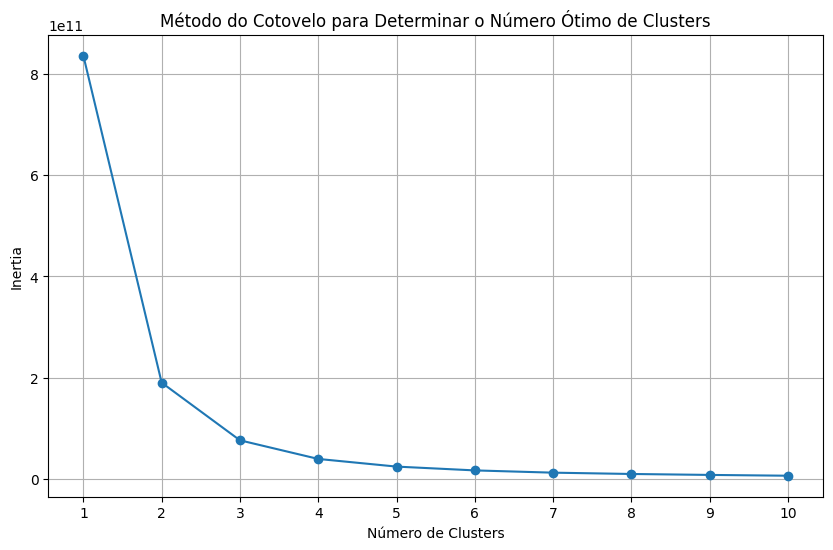

In [5]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar o Número Ótimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_encoded)

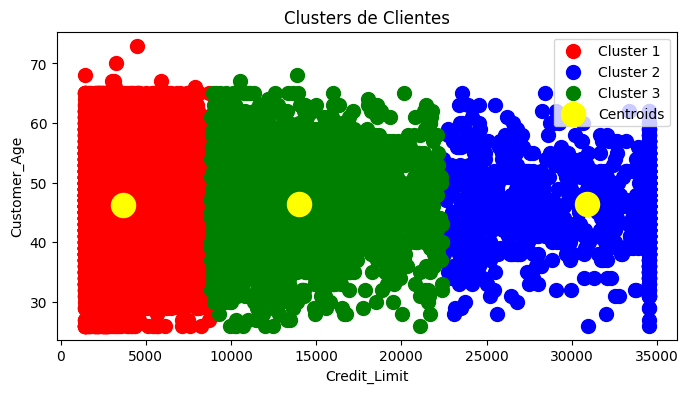

In [9]:
plt.figure(figsize=(8, 4))
plt.scatter(data_encoded.iloc[pred_y == 0, 0], data_encoded.iloc[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_encoded.iloc[pred_y == 1, 0], data_encoded.iloc[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_encoded.iloc[pred_y == 2, 0], data_encoded.iloc[pred_y == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Clientes')
plt.xlabel('Credit_Limit')
plt.ylabel('Customer_Age')
plt.legend()
plt.show()

In [10]:
bank_data['Cluster'] = kmeans.labels_
cluster_distribution = bank_data['Cluster'].value_counts().sort_index()

# Exibindo a distribuição dos clusters
cluster_distribution

Cluster
0    7001
1    1070
2    2056
Name: count, dtype: int64

In [11]:
# Calculando estatísticas descritivas para cada cluster
cluster_stats = bank_data.groupby('Cluster')[['Credit_Limit', 'Customer_Age']].describe()
cluster_stats

Credit_Limit                                                        \
               count          mean          std      min      25%      50%   
Cluster                                                                      
0             7001.0   3665.662491  1946.692085   1438.3   2185.0   3035.0   
1             1070.0  30877.556075  4270.543579  22437.0  26792.0  33456.5   
2             2056.0  13965.713521  3806.263779   8818.0  10686.5  13198.0   

                           Customer_Age                                   \
              75%      max        count       mean       std   min   25%   
Cluster                                                                    
0         4802.00   8808.0       7001.0  46.298814  8.292207  26.0  41.0   
1        34516.00  34516.0       1070.0  46.394393  6.850233  26.0  42.0   
2        16791.75  22399.0       2056.0  46.382782  7.618832  26.0  41.0   

                           
          50%   75%   max  
Cluster                    
0        46.0  52.0  73.0  
1        47.0  51.0  65.0  
2        46.0  51.0  68.0

In [13]:
# Análise de Frequência para Variáveis Categóricas: Para variáveis categóricas (como Gender, Customer type, Product line, Payment), você pode analisar a frequência de cada categoria dentro dos clusters para identificar padrões específicos. Por exemplo, um cluster pode ter uma proporção maior de compras de uma linha de produtos específica ou uma predominância de um gênero.

categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Criando um dicionário para armazenar os resultados
cluster_category_frequencies = {}

for var in categorical_vars:
    # Agrupando os dados por 'Cluster' e então pela variável categórica, contando o número de ocorrências
    frequency = bank_data.groupby(['Cluster', var]).size().unstack(fill_value=0)
    # Salvando o resultado no dicionário
    cluster_category_frequencies[var] = frequency

# Agora, você pode acessar a frequência de cada variável categórica dentro dos clusters como segue
# Por exemplo, para 'Gender'
print(cluster_category_frequencies['Gender'])
print(cluster_category_frequencies['Education_Level'])
print(cluster_category_frequencies['Marital_Status'])
print(cluster_category_frequencies['Income_Category'])
print(cluster_category_frequencies['Card_Category'])

# Repita para outras variáveis categóricas conforme necessário

Gender      F     M
Cluster            
0        4632  2369
1         116   954
2         610  1446
Education_Level  College  Doctorate  Graduate  High School  Post-Graduate  \
Cluster                                                                     
0                    702        315      2181         1394            352   
1                    112         48       317          210             56   
2                    199         88       630          409            108   

Education_Level  Uneducated  Unknown  
Cluster                               
0                      1000     1057  
1                       166      161  
2                       321      301  
Marital_Status  Divorced  Married  Single  Unknown
Cluster                                           
0                    485     3356    2666      494
1                     93      428     452       97
2                    170      903     825      158
Income_Category  $120K +  $40K - $60K  $60K - $80K  $80K - $120K

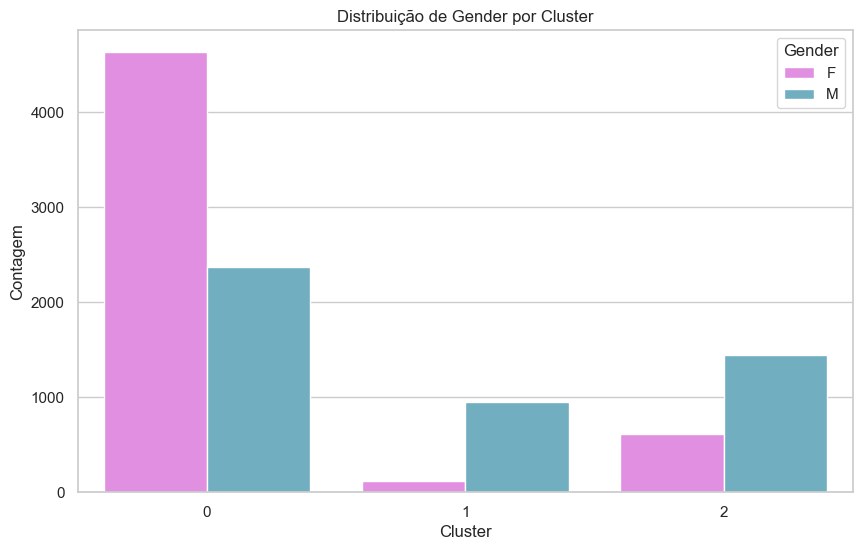

In [19]:
# Pessoas no cluster 1 = 7001
# Pessoas no cluster 2 = 1070
# Pessoas no cluster 3 = 2056

# Definindo o estilo do gráfico
sns.set(style="whitegrid")
custom_palette = ["violet", "c"]

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=bank_data, palette=custom_palette)
plt.title('Distribuição de Gender por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()

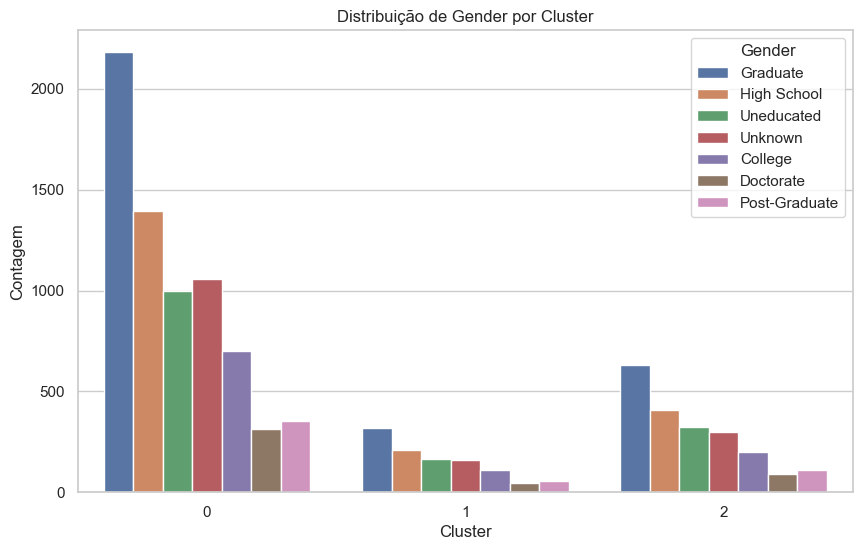

In [22]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")
# custom_palette = ["violet", "c"]

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Education_Level', data=bank_data)
plt.title('Distribuição de Gender por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gender')
plt.show()

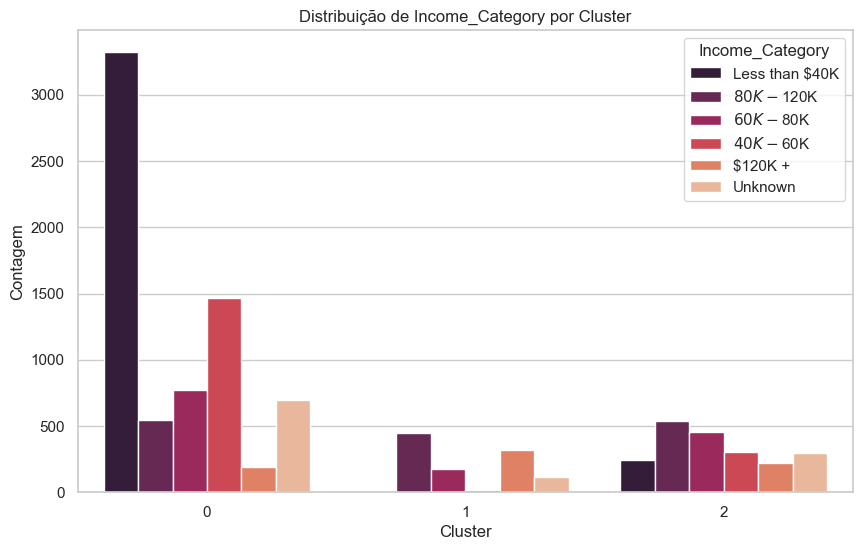

In [27]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")
# custom_palette = ["violet", "c"]

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Income_Category', data=bank_data, palette="rocket")
plt.title('Distribuição de Income_Category por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Income_Category')
plt.show()

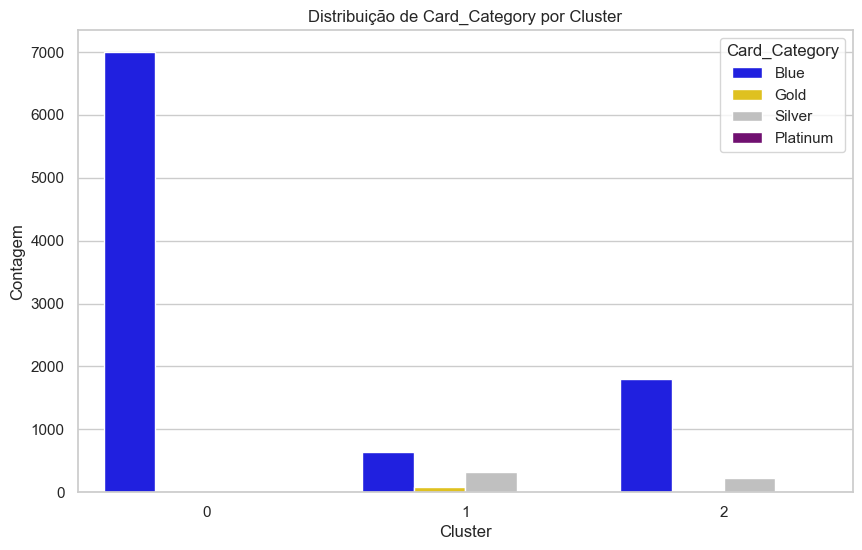

In [30]:
# Definindo o estilo do gráfico
sns.set(style="whitegrid")
custom_palette = {'Blue': 'blue', 'Gold': 'gold', 'Silver': 'silver', 'Platinum': 'purple'}
colors = [custom_palette[cat] for cat in bank_data['Card_Category'].unique()]

# Criando um gráfico de barras para visualizar a distribuição de Gender por Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Card_Category', data=bank_data, palette=colors)
plt.title('Distribuição de Card_Category por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Card_Category')
plt.show()

In [36]:
# Calculando a pontuação da silhueta
silhouette_avg = silhouette_score(data_encoded, kmeans.labels_)
print("Pontuação média da silhueta:", silhouette_avg)

Pontuação média da silhueta: 0.7008401423511791


In [35]:
cluster_card_counts = bank_data.groupby(['Cluster', 'Card_Category']).size().unstack()
cluster_card_percentages = cluster_card_counts.div(cluster_card_counts.sum(axis=1), axis=0) * 100

# Exibindo a distribuição em percentagens
print("Distribuição de Card_Category por Cluster em percentagens:\n")
print(cluster_card_percentages)

Distribuição de Card_Category por Cluster em percentagens:

Card_Category       Blue      Gold  Platinum     Silver
Cluster                                                
0              99.914298  0.042851       NaN   0.042851
1              60.093458  8.224299  1.495327  30.186916
2              87.451362  1.215953  0.194553  11.138132
